<a href="https://colab.research.google.com/github/Kango911/3_Lab_Algo/blob/main/3_Lab_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт необходимых библиотек

In [1]:
import random
import time
import matplotlib.pyplot as plt

# Определение класса узла дерева

In [2]:
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

# Определение класса двоичного дерева поиска


In [3]:
class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert_recursive(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert_recursive(node.right, key)

    def inorder(self):
        return self._inorder_recursive(self.root)

    def _inorder_recursive(self, node):
        return self._inorder_recursive(node.left) + [node.val] + self._inorder_recursive(node.right) if node else []

    def height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if not node:
            return 0
        return 1 + max(self._height_recursive(node.left), self._height_recursive(node.right))

    def delete_key(self, key):
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, node, key):
        if not node:
            return node
        if key < node.val:
            node.left = self._delete_recursive(node.left, key)
        elif key > node.val:
            node.right = self._delete_recursive(node.right, key)
        else:
            # Узел с одним или ни одним дочерним узлом
            if not node.left:
                return node.right
            elif not node.right:
                return node.left

            # Узел с двумя дочерними узлами
            min_larger_node = self._min_value_node(node.right)
            node.val = min_larger_node.val
            node.right = self._delete_recursive(node.right, min_larger_node.val)
        return node

    def _min_value_node(self, node):
        current = node
        while current.left:
            current = current.left
        return current

# Функция для генерации случайных чисел и построения дерева

In [4]:
def generate_bst_and_sort(num_elements, value_range):
    # Убедитесь, что количество элементов не больше диапазона
    if num_elements > value_range:
        raise ValueError("Количество элементов не может превышать диапазон значений.")

    bst = BinarySearchTree()
    random_numbers = random.sample(range(1, value_range + 1), num_elements)

    start_time = time.time()
    for number in random_numbers:
        bst.insert(number)
    end_time = time.time()

    sorted_array = bst.inorder()

    return sorted_array, end_time - start_time

# Замеры времени для различных размеров и диапазонов

In [5]:
results = []
sizes = [1000, 5000, 10000]
ranges = [1, 500]

for size in sizes:
    for r in ranges:
        if size > r:
          print(f"Пропускаем размер {size} для диапазона {r} (слишком мал).")
          continue  # Пропускаем этот случай
          sorted_array, duration = generate_bst_and_sort(size, r)
          results.append((size, r, duration))

Пропускаем размер 1000 для диапазона 1 (слишком мал).
Пропускаем размер 1000 для диапазона 500 (слишком мал).
Пропускаем размер 5000 для диапазона 1 (слишком мал).
Пропускаем размер 5000 для диапазона 500 (слишком мал).
Пропускаем размер 10000 для диапазона 1 (слишком мал).
Пропускаем размер 10000 для диапазона 500 (слишком мал).


# Вывод результатов

In [6]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Size", "Range", "Duration"])
print(results_df)


Empty DataFrame
Columns: [Size, Range, Duration]
Index: []


# Визуализация результатов

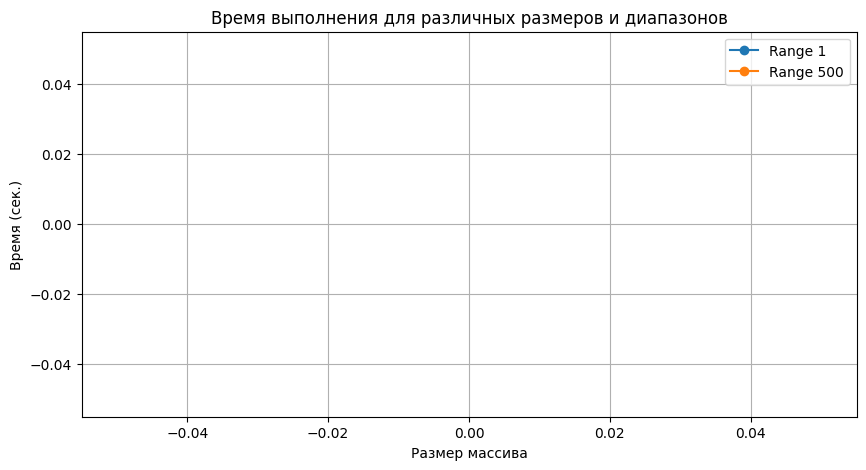

In [7]:
plt.figure(figsize=(10, 5))
for r in ranges:
    subset = results_df[results_df['Range'] == r]
    plt.plot(subset['Size'], subset['Duration'], marker='o', label=f'Range {r}')

plt.title('Время выполнения для различных размеров и диапазонов')
plt.xlabel('Размер массива')
plt.ylabel('Время (сек.)')
plt.legend()
plt.grid()
plt.show()


# Часть 2: Определение высоты дерева и удаление узлов
# Генерация ДДП из 50 узлов с ключами от 1 до 25

In [8]:
bst2 = BinarySearchTree()
for _ in range(50):
    bst2.insert(random.randint(1, 25))

# Определение высоты дерева
height_of_tree = bst2.height()
print(f'Высота дерева: {height_of_tree}')

Высота дерева: 12


# Удаление узлов с заданным ключом

In [9]:
key_to_delete = int(input("Введите число X для удаления узлов: "))
bst2.delete_key(key_to_delete)

# Вывод оставшихся узлов дерева после удаления
remaining_nodes = bst2.inorder()
print(f'Оставшиеся узлы после удаления {key_to_delete}: {remaining_nodes}')

Введите число X для удаления узлов: 77
Оставшиеся узлы после удаления 77: [1, 1, 1, 2, 3, 4, 4, 5, 5, 5, 5, 6, 6, 8, 8, 8, 8, 8, 10, 10, 10, 11, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 16, 17, 17, 19, 20, 20, 20, 20, 21, 22, 22, 23, 23, 24, 24, 24, 25]
